# Our first Model

In the very end of the script, you can find all the workflow at once

In [105]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [106]:
# Use linear regression to create X and y

weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1) #Important, not sure why unsqueeze.
y = weight * X + bias
len(y)

50

### Training and Test Set

In [107]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Also you can use scikit learn, we will see it later

### Create Visualization of Tensors

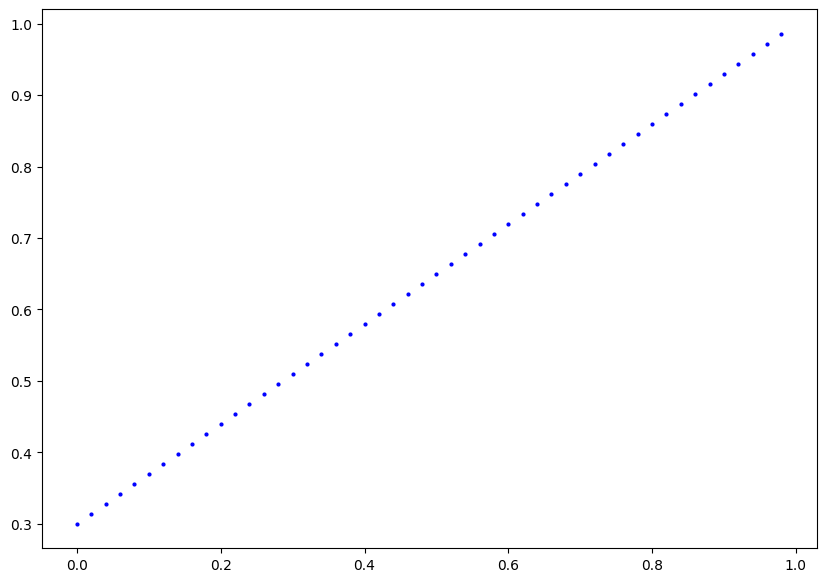

In [108]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")
  plt.scatter(test_data, test_labels, c = "b", s = 4, label = "Test data")

  if predictions is not None:
      plt.scatter(test_data, plot_predictions)



plot_predictions()

### Model Building Essentials

* torch.nn - all of the buildings for NN
* torch.nn.Parameter - what our model should learn
* torch.nn.Module - the base class
* torch.optim - optimizers

### Create a first model to predict the linear regression above

We use for now Gradient Descent, not Backpropagation

In [109]:
# Create a model Class

class LinearRegressionModel(nn.Module): # inherits from nn.Module
  def __init__(self):
    super().__init__()

    # Initialize model parameters (weights and biases for us)
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True, # default. To use Gradient Descent
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

  # Forward method to do computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input
    return self.weights * x + self.bias

In [110]:
# Initialize a model and look at parameters
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Make predictions

In [111]:
# If the model is trained, I can easily make prediction this way

with torch.inference_mode(): # makes it faster, does not track gradients and what happens in between
  y_preds = model_0(X_test) #it's like calling .forward(X_test)!

### Training our model
* Loss function - tells me how wrong I am
* Optimizer - given the loss, it adjusts parameters and learns

We will need:
* a training loop
1. forward pass
2. calculate loss
3. optimizer zero grad
4. backward pass
5. optimizer step
* a test loop
1. forward pass
2. calculate test loss

In [112]:
# Setup a Loss Function
loss_fn = nn.L1Loss() # MAE

# Setup an optimizer ( SGD, Adam, adagrad...)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # learning rate

In [113]:
# Build a training loop

torch.manual_seed(42)

epochs = 200 # one loop through the data
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  model_0.train() # training mode

  y_pred = model_0(X_train) # forward pass

  loss = loss_fn(y_pred, y_train) # calculate loss
  loss_values.append(loss)
  #print(f"Loss: {loss}")

  optimizer.zero_grad() # optimizer zero grad. Otherwise optimizer accumulates. we set it everytime to 0

  loss.backward() # perform back propagation

  optimizer.step() # perform gradient descent


  model_0.eval()
  with torch.inference_mode(): # with these 2 we enter testing mode

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)
    test_loss_values.append(test_loss)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}")

  #model_0.state_dict() # check current values of parameters


Epoch: 0 | Training Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Training Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Training Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Training Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Training Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Training Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Training Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Training Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Training Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Training Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Training Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Training Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Training Loss: 0.017585465

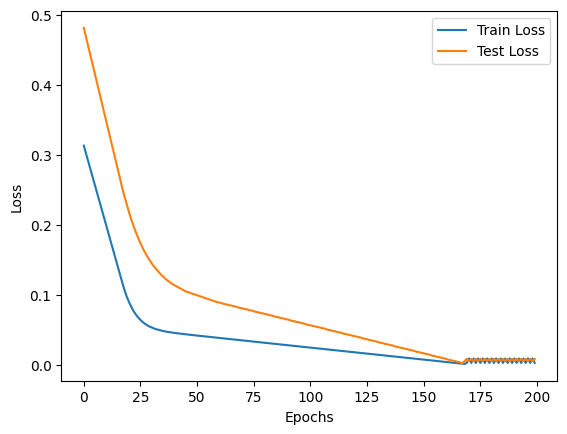

In [114]:
#Plot Losses
plt.plot(np.array(range(0,epochs)),np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(np.array(range(0,epochs)),np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving and Load a Model in PyTorch

There are 3 ways
1. torch.save() - save in Python pickle format
2. torch.load()
4. torch.nn.Module.load_state_dict() - load saved state dictionary

In [115]:
# Save a model (only the state_dict!)
from pathlib import Path

#1. Create models directory with code
Model_Path = Path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

#2. Model save path
model_name = "01_pytorch.pth"
model_save_path = Model_Path / model_name

model_save_path # I get this path 'models/01_pytorch.pth'

#3. Save the model state_dict, it's better!

torch.save(model_0.state_dict(), model_save_path)

# Now you can dowload in local

In [116]:
# Load a state_dict

# Initialize an object of Model class first, in my case LinearRegressionModel
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(model_save_path))

loaded_model_0.state_dict() #loaded correctly

<ipython-input-116-1e9d823c4626>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(model_save_path))


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## Putting all together

In [117]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Device-agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"I am using the device: {device}")

I am using the device: cpu


In [118]:
# Create data

weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(1)
y = bias + weight * X

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


#New way of creating the class (i.e. model)
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, # one input: X
                                  out_features = 1) # one output: y

  def forward(self, x:torch.Tensor) -> torch.Tensor: # I am forcing to receive and output a tensor!!
    return self.linear_layer(x)

torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

loss = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

epochs = 200

for epoch in range(epochs):

  model_1.train()
  y_pred = model_1(X_train)
  loss_train = loss(y_pred, y_train)
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    loss_pred = loss(test_pred, y_test)

  if (epoch + 1) % 20 == 0 or epoch == epochs - 1:
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss_train} | Test Loss: {loss_pred}")

model_1.state_dict()



Epoch 20/200 | Train Loss: 0.3362792134284973 | Test Loss: 0.318027526140213
Epoch 40/200 | Train Loss: 0.1058594360947609 | Test Loss: 0.048607878386974335
Epoch 60/200 | Train Loss: 0.020298857241868973 | Test Loss: 0.046905118972063065
Epoch 80/200 | Train Loss: 0.013428186066448689 | Test Loss: 0.030360037460923195
Epoch 100/200 | Train Loss: 0.006563370116055012 | Test Loss: 0.014501834288239479
Epoch 120/200 | Train Loss: 0.010256484150886536 | Test Loss: 0.0003308236482553184
Epoch 140/200 | Train Loss: 0.010256484150886536 | Test Loss: 0.0003308236482553184
Epoch 160/200 | Train Loss: 0.010256484150886536 | Test Loss: 0.0003308236482553184
Epoch 180/200 | Train Loss: 0.010256484150886536 | Test Loss: 0.0003308236482553184
Epoch 200/200 | Train Loss: 0.010256484150886536 | Test Loss: 0.0003308236482553184


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])